In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jobs import visualisation, utilities

# Collect data and show an overview of it

In [2]:
data_frame = pd.read_csv('dataset/data.csv')
data_frame.head()


#stream     isp    browser  connected            p2p            cdn
0        1     Fro       Iron       True  195910.840977  109025.960619
1        1     Fro  EarthWolf       True  186711.522041  113744.856814
2        1  Arange       Iron       True  189428.293434  115944.246844
3        1  Arange       Iron       True       0.000000  307577.191067
4        1     BTP  EarthWolf       True  207246.640473  107010.608093

In [3]:
data_frame.dtypes

#stream        int64
isp           object
browser       object
connected       bool
p2p          float64
cdn          float64
dtype: object

# Here I want to see the repartition of each column

We can easily say that the most used browser are EarhhWolf and Iron.

<Figure size 432x288 with 0 Axes>

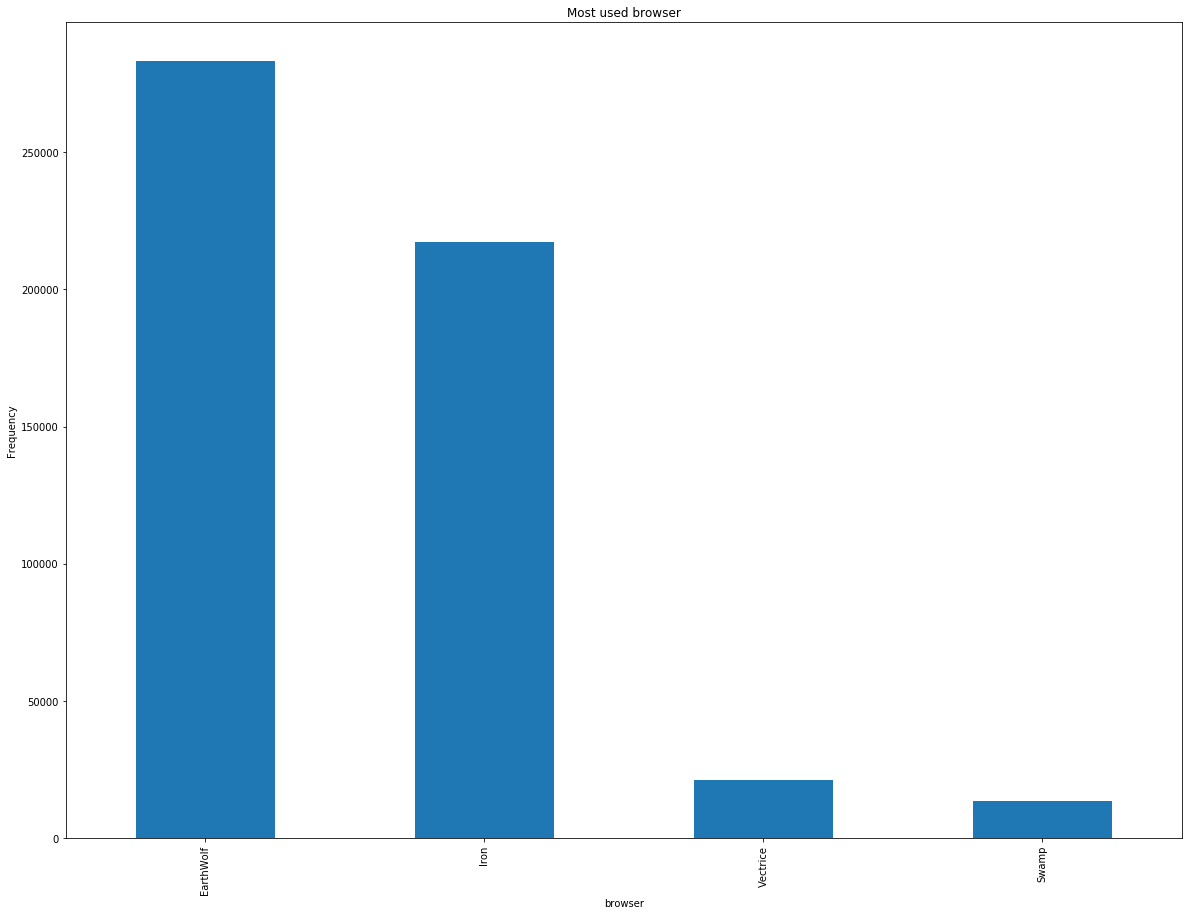

In [4]:
visualisation.plot_bargraph_with_groupings(data_frame, 'browser', 'Most used browser', 'browser', 'Frequency')

3 Ips the most frequent will be Arange, Fro and BTP

<Figure size 432x288 with 0 Axes>

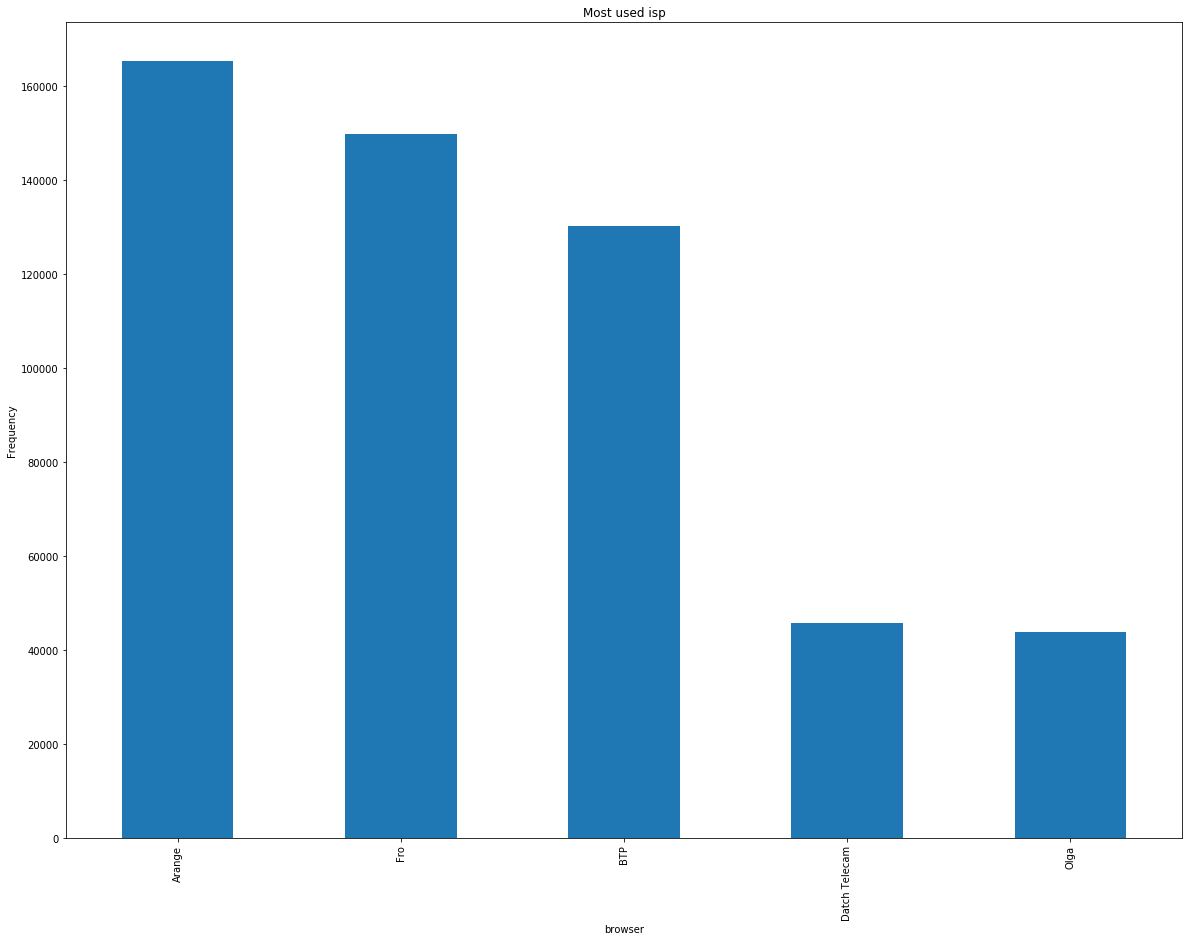

In [5]:

visualisation.plot_bargraph_with_groupings(data_frame, 'isp', 'Most used isp', 'browser', 'Frequency')


Because I'm working on a streamroot dataset it will be logical to say that we expect the 3 tops movies (3,1 and 7) will be the most using p2p. 

<Figure size 432x288 with 0 Axes>

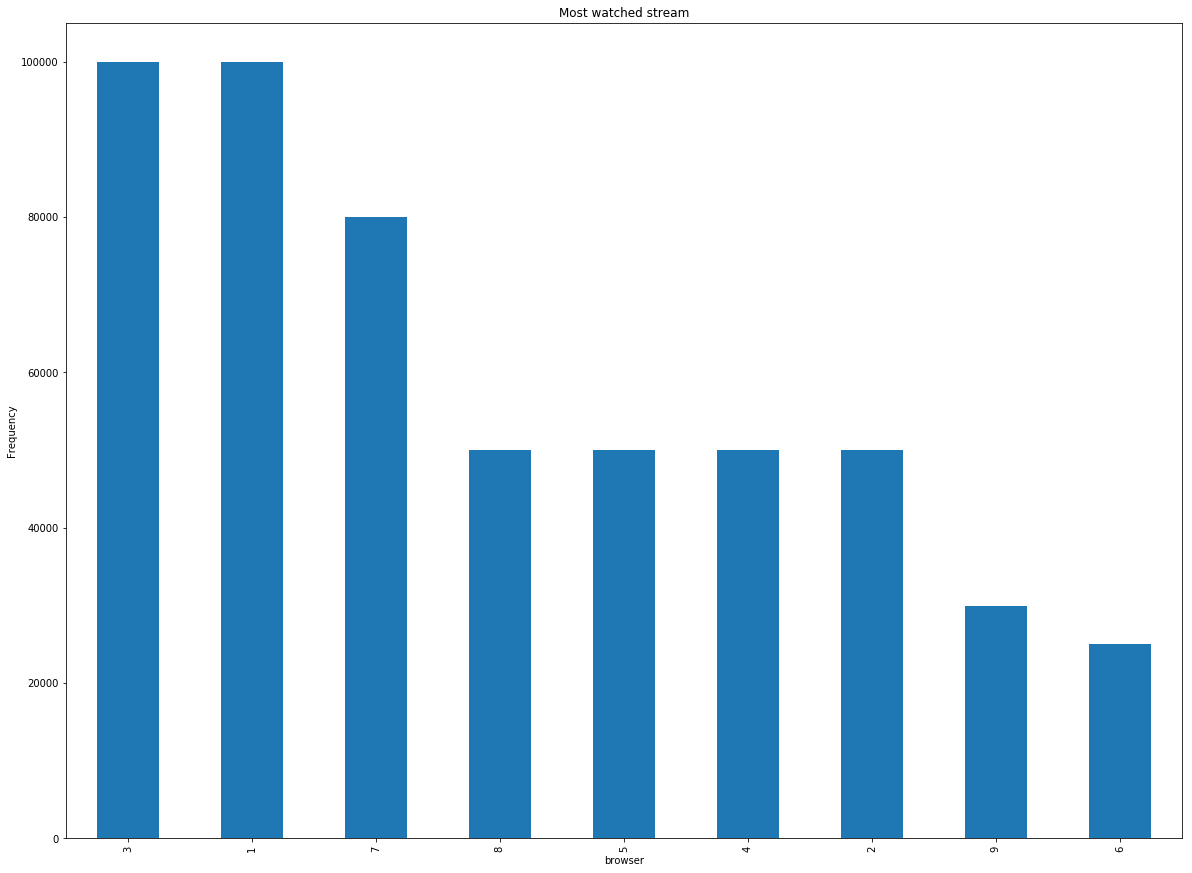

In [6]:
visualisation.plot_bargraph_with_groupings(data_frame, '#stream', 'Most watched stream', 'browser', 'Frequency')

# In this next visualisation we will try to understand the lack of p2p for the movie 3

So first of all I want the repartion of stream Id when the user is connected and has access to p2p. 
On the shema beside we can see that the most commons are stream 1,7,8,4,2. But we have strange result for the stream ID 3.

<Figure size 432x288 with 0 Axes>

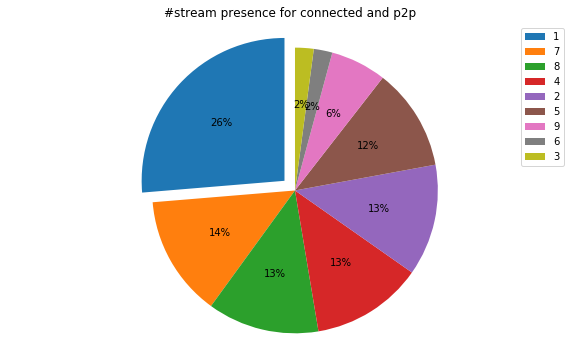

In [7]:
series_co_with_p2p = data_frame.loc[(data_frame["p2p"] != 0.0) & (data_frame["connected"] == True)]
utilities.pie_media_presence(series_co_with_p2p, '#stream', 'connected and p2p')

I want to check if the stream Id 3 is usually not connected then it would be explain why we don't have a lot of user using p2p with it.
But as we see below the users watching stream ID 3 are connected to the platform for 76% of the users.

<Figure size 432x288 with 0 Axes>

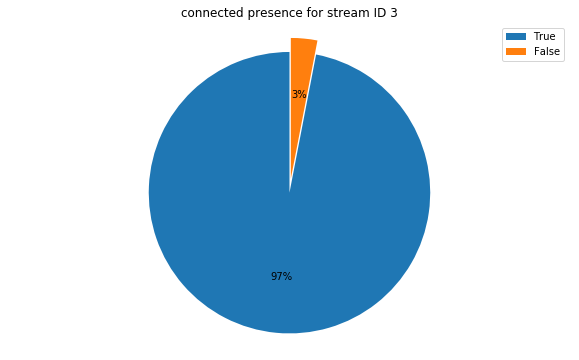

In [8]:
stream_id_3 = data_frame.loc[(data_frame["#stream"] == 3)]
utilities.pie_media_presence(stream_id_3, 'connected', 'stream ID 3')

Maybe some browser or isp don't deliver p2p, then I need to check it out. I'll first check the commons browser and isp for the stream ID 3 and check the result with the presence of those for users using p2p.

We can see thanks of the two pies below that the most common browser are EearthWolf and Iron. What is kind of logic if you checked the 1st figure you'll see that these browser are the most commons.
The most commons isp Arrange, Fro and BTP. No warning these are the most used isp.

<Figure size 432x288 with 0 Axes>

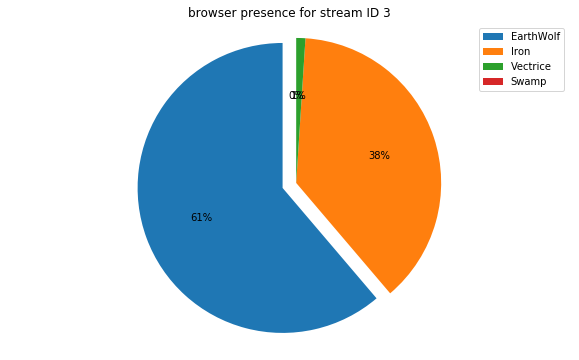

In [9]:
utilities.pie_media_presence(stream_id_3, 'browser', 'stream ID 3')

<Figure size 432x288 with 0 Axes>

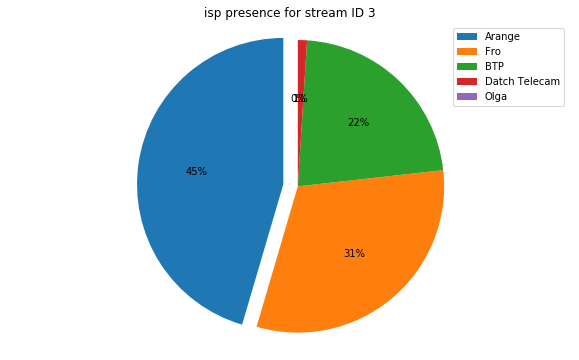

In [10]:
utilities.pie_media_presence(stream_id_3, 'isp', 'stream ID 3')

We now want to check the presence of the browser and isp when the user is using p2p.
After a check on the browser and the isp we can't explain the lack of p2p for the stream id 3. So I think the reason of this lack of p2p for this movie is the localisation of this users or/and their internet condition.

In [11]:
series_co_with_p2p = data_frame.loc[(data_frame["p2p"] != 0.0) & (data_frame["connected"] == True)]



<Figure size 432x288 with 0 Axes>

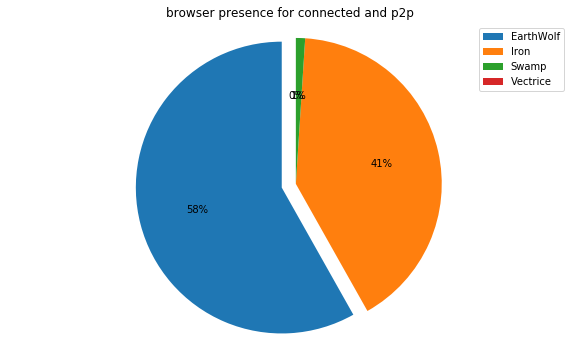

In [12]:
utilities.pie_media_presence(series_co_with_p2p, 'browser', 'connected and p2p')

<Figure size 432x288 with 0 Axes>

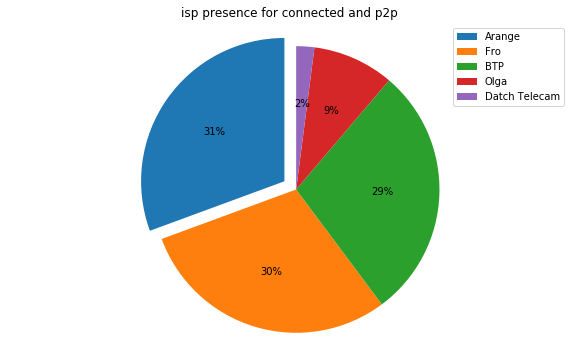

In [13]:
utilities.pie_media_presence(series_co_with_p2p, 'isp', 'connected and p2p')

# We will see the performance of streamroot

We can see that only 26% of the users are'nt using p2p and 64% benefits of p2p. That is a great repartition of ressources.

<Figure size 432x288 with 0 Axes>

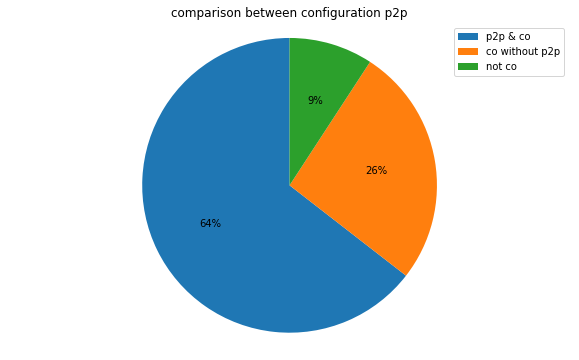

In [14]:
series_co_with_p2p = data_frame.loc[(data_frame["p2p"] != 0.0) & (data_frame["connected"] == True)]
series_co_without_p2p = data_frame.loc[((data_frame["p2p"] == 0.0) & (data_frame["connected"] == True))]
series_no_co_without_p2p = data_frame.loc[(data_frame["p2p"] == 0.0) & (data_frame["connected"] == False)]

utilities.connected_unconnected_p2p(series_co_with_p2p, series_co_without_p2p, series_no_co_without_p2p)


Now we will see wich browser have good results with p2p. So the first is EarthWolf that is kind of great because it's the most used. Even if they don't have a huge dataset of users Swamp and Vetrice have maybe a problem with the p2p.

<Figure size 432x288 with 0 Axes>

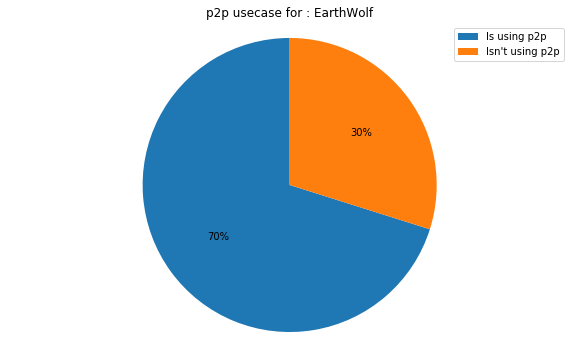

In [15]:
earth_wolf = data_frame.loc[(data_frame["browser"] == 'EarthWolf')]
utilities.pie_using_p2p(earth_wolf, 'EarthWolf')

<Figure size 432x288 with 0 Axes>

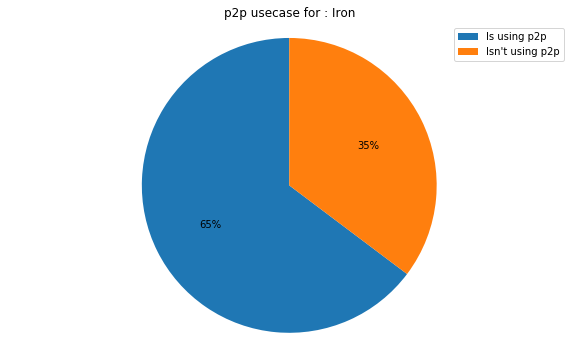

In [16]:
iron = data_frame.loc[(data_frame["browser"] == 'Iron')]
utilities.pie_using_p2p(iron, 'Iron')

<Figure size 432x288 with 0 Axes>

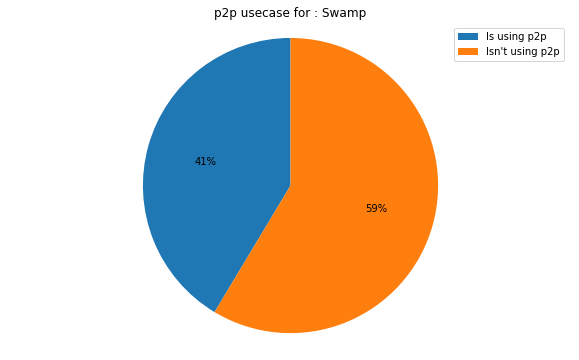

In [17]:
swamp = data_frame.loc[(data_frame["browser"] == 'Swamp')]
utilities.pie_using_p2p(swamp, 'Swamp')

<Figure size 432x288 with 0 Axes>

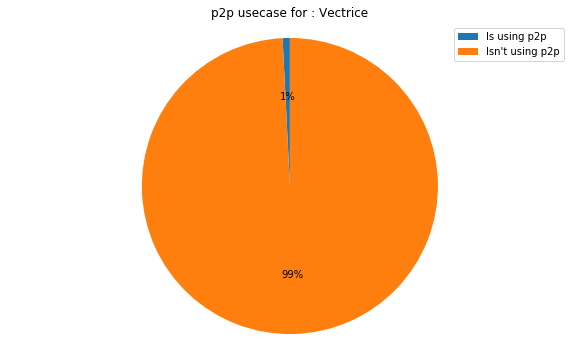

In [18]:
vectrice = data_frame.loc[(data_frame["browser"] == 'Vectrice')]
utilities.pie_using_p2p(vectrice, 'Vectrice')

So I decided to see if they are ofently connect to the streamroot platform. But actually they are well connected to the streamroot platform. So maybe the problem is comming from the fact that they don't have a lot of users. I don't know streamroot technology enough to make relevants return about this analyze.

<Figure size 432x288 with 0 Axes>

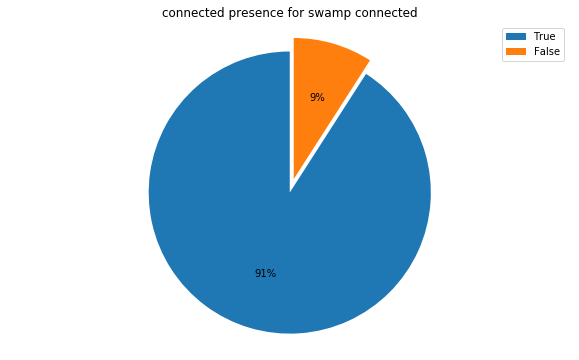

In [19]:
swamp_connect = data_frame.loc[(data_frame["browser"] == 'Swamp')]
utilities.pie_media_presence(swamp_connect, 'connected', 'swamp connected')

<Figure size 432x288 with 0 Axes>

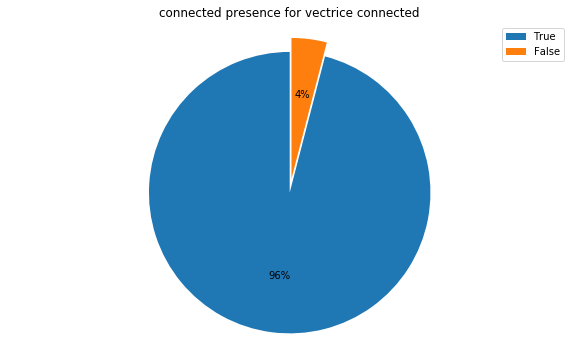

In [20]:
vectrice_connect = data_frame.loc[(data_frame["browser"] == 'Vectrice')]
utilities.pie_media_presence(vectrice_connect, 'connected', 'vectrice connected')

So now I'll check that each isp doing well. They are all doing well except Datch Telecam here there is a big issue.

<Figure size 432x288 with 0 Axes>

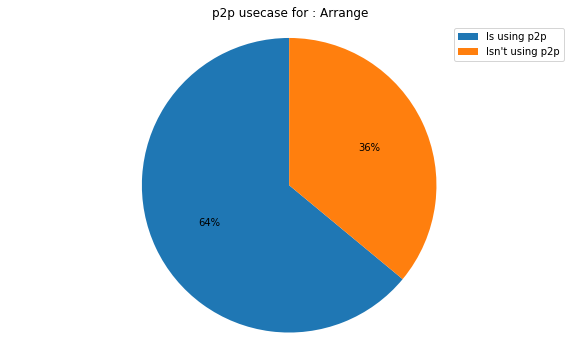

In [21]:
arrange = data_frame.loc[(data_frame["isp"] == 'Arange')]
utilities.pie_using_p2p(arrange, 'Arrange')

<Figure size 432x288 with 0 Axes>

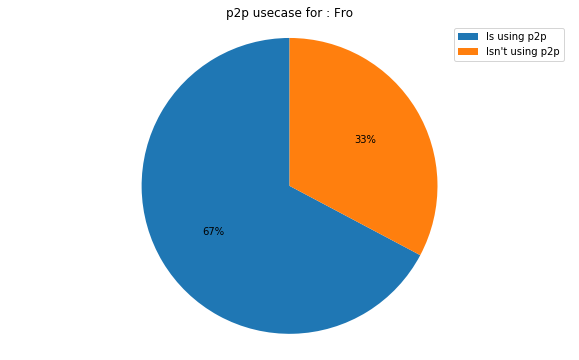

In [22]:
fro = data_frame.loc[(data_frame["isp"] == 'Fro')]
utilities.pie_using_p2p(fro, 'Fro')

<Figure size 432x288 with 0 Axes>

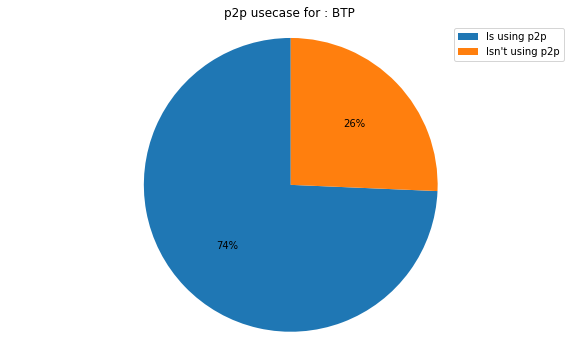

In [23]:
btp = data_frame.loc[(data_frame["isp"] == 'BTP')]
utilities.pie_using_p2p(btp, 'BTP')

<Figure size 432x288 with 0 Axes>

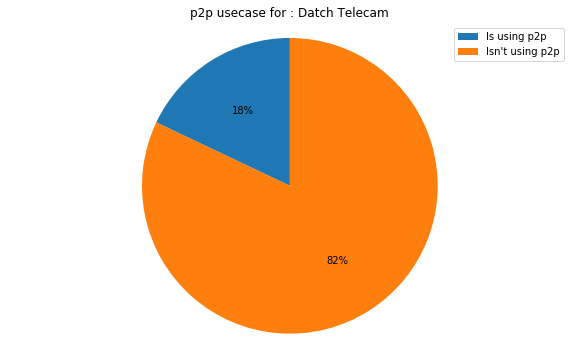

In [24]:
datch = data_frame.loc[(data_frame["isp"] == 'Datch Telecam')]
utilities.pie_using_p2p(datch, 'Datch Telecam')

<Figure size 432x288 with 0 Axes>

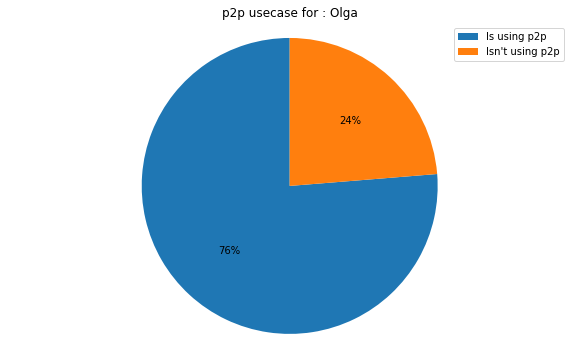

In [25]:
olga = data_frame.loc[(data_frame["isp"] == 'Olga')]
utilities.pie_using_p2p(olga, 'Olga')

Datch telecom is well connected to streamroot. As I saif for Swamp and Vetrice if I had to say an end it will be due to the lack of users.

<Figure size 432x288 with 0 Axes>

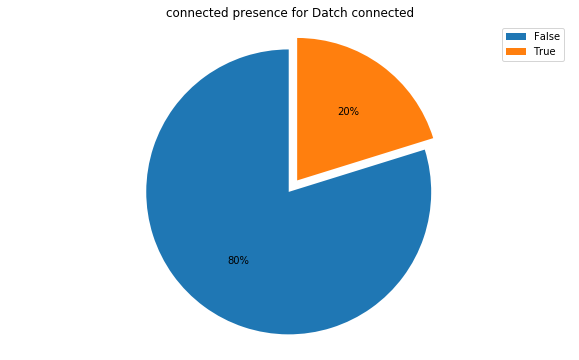

In [28]:
utilities.pie_media_presence(datch, 'connected', 'Datch connected')



# Conclusion

I'll say that streamroot have a got percentage of repartion of his p2p. 140716 users are giving bandwith to 345037 users. We can see that it is actually a good result. 
My warnings are:
- Strange result of the movie stream 3. They are a lot of users, using multiple browser but it represents just 1% of the p2p distribution.
- The two browsers Vectrice and Swamp why they are so low in the p2p score
- The isp Datch Telecom wich are desperetly low for the use of p2p.
- I don't know if it is usual but one user don't have cdn. His id is : 534953.

You can get all the images they are generate in the output if you lauch this program.

# Choice of application

I went for python because I'm used to it. Plus you can make your own library. With more times I can have some dashboard with multiple visualisations. And surely better visualisation. But in the given time I couldn't work on more type of visualisation.
So python is an easy language and has a lot of library (build your own or use extern's one). It gives you a program that could evolve easily to simplify a lot of task.

If you want to use the app install the requirement with 'pip install -r requirements'